# INFORME FINAL:
#🎯 Challenge #2: TelecomX - Análisis y Evasión de Clientes




## Introducción


<p align='justify'>Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión.</p>

<p align='justify'>El objetivo general es:
* Realizar un análisis predictivo para determinar la causa de la evasión de clientes.</p>

Objetivos particulares:

1. Realizar una recopilación, extracción y transformación de la información proporcionada
2. Elaborar los analisis de frecuencia y distribución para cada una de las categorías y variables solicitadas por el equipo de ciencia de datos.
3. Elaborar gráficos que faciliten las labores al equipo de ciencia datos para predecir las causas de evasión de clientes

## 🪛 Crear el repositorio de tu proyecto en GitHub:

###Descripción



<p align='justify'>A la hora de desarrollar proyectos, sabemos lo esencial que es organizar el trabajo desde el principio. Por lo tanto, en este desafío, tendrás que crear un repositorio en GitHub para almacenar y versionar tu proyecto.</p>

<p align='justify'>Incluso si aún no has desarrollado ningún código, el objetivo es crear una estructura inicial para el proyecto. A medida que avances, podrás actualizar y agregar archivos al repositorio.</p>

Materiales de apoyo
Si necesita ayuda, consulte los siguientes recursos:

* [Git - Acerca del Control de Versiones](https://git-scm.com/book/es/v2/Inicio---Sobre-el-Control-de-Versiones-Acerca-del-Control-de-Versiones)
* [Iniciando un repositorio con Git | Alura Cursos Online](https://www.aluracursos.com/blog/iniciando-repositorio-con-git)

<p align='justify'>¡Organizar tu proyecto desde el principio facilita el desarrollo y garantiza buenas prácticas en el control de versiones! 🚀</p>

##📌 Extracción

In [ ]:
#importar la biblioteca de "pandas"
#Realizar la extracción de la base de datos compartida y guardarla en
import pandas as pd

url_1 = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos_Telecom = pd.read_json(url_1)

In [ ]:
datos_Telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 Transformación

###Conoce el conjunto de datos

<p align='justify'>Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.</p>

<p align='justify'>📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.</p>

🔗 [Enlace al diccionario y a la API](https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md)

¿Qué debes hacer?

* ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
* ✅ Consultar el diccionario para comprender mejor el significado de las variables.
* ✅ Identificar las columnas más relevantes para el análisis de evasión.

📌 Tips:
🔗 [Documentación de DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
🔗 [Documentación de DataFrame.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

####✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [ ]:
datos_Telecom_customer= pd.json_normalize(datos_Telecom ['customer'])
datos_Telecom_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
columnas = list(datos_Telecom.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [ ]:
datos_Telecom_phone= pd.json_normalize(datos_Telecom ['phone'])
datos_Telecom_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
datos_Telecom_account= pd.json_normalize(datos_Telecom ['account'])
datos_Telecom_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos_Telecom_internet= pd.json_normalize(datos_Telecom ['internet'])
datos_Telecom_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
#Incorporar las columnas ya normalizadas a nuestro dataframe 'datos_Telecom'
datos_Telecom = pd.concat([datos_Telecom, datos_Telecom_customer, datos_Telecom_phone, datos_Telecom_account, datos_Telecom_internet], axis=1)
datos_Telecom.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
#requerimos eliminar las columnas 'customer', 'phone', 'internet', 'account' del dataframe 'datos_Telecom'
datos_Telecom.drop('customer', axis=1, inplace=True)
datos_Telecom.drop('phone', axis=1, inplace=True)
datos_Telecom.drop('internet', axis=1, inplace=True)
datos_Telecom.drop('account', axis=1, inplace=True)
datos_Telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No


####Inconsistencias encontradas


In [ ]:
#debemos verificar la existencia de datos nulos en el datatframe 'datos_Telecom'
datos_Telecom.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
contract,0


Con lo anterior, podemos observar que no existentes datos nulos o faltantes

In [ ]:
#Vamos a revisar que no existan datos duplicados
datos_Telecom.duplicated().sum()

np.int64(0)

Una vez concluida la exploración podemos afirmar que no existen datos nulos o duplicados en el dataframe

In [ ]:
datos_Telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,...,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,65.60,593.3,DSL,0,1,0,1,1,0,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,59.90,542.4,DSL,0,0,0,0,0,1,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,2,...,55.15,742.9,DSL,1,0,0,1,0,0,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,50.30,92.75,DSL,0,1,0,0,0,0,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,3,...,67.85,4627.65,DSL,1,0,1,1,0,1,1.012687


###Manejo de inconsistencias

###Estandarización y transformación de datos (opcional)

Procedemos a modificar las variables tipo bool (yes, No) por valores binarios (0,1)

In [ ]:
#en la columna 'churn', 'Partner',  cambiar string yes or No a int, 0 y 1
#datos_Telecom['Churn'] = datos_Telecom['Churn'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['Partner'] = datos_Telecom['Partner'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['Dependents'] = datos_Telecom['Dependents'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['PhoneService'] = datos_Telecom['PhoneService'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['MultipleLines'] = datos_Telecom['MultipleLines'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['OnlineSecurity'] = datos_Telecom['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['OnlineBackup'] = datos_Telecom['OnlineBackup'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['DeviceProtection'] = datos_Telecom['DeviceProtection'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['TechSupport'] = datos_Telecom['TechSupport'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['StreamingTV'] = datos_Telecom['StreamingTV'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['StreamingMovies'] = datos_Telecom['StreamingMovies'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['PaperlessBilling'] = datos_Telecom['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
#datos_Telecom['Contract'] = datos_Telecom['Contract'].replace({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
#datos_Telecom
#datos_Telecom['multiple_lines'] = datos_Telecom['multiple_lines'].replace({'No phone service': 0})
#datos_Telecom['online_security'] = datos_Telecom['online_security'].replace({'No internet service': 0})
#datos_Telecom['online_backup'] = datos_Telecom['online_backup'].replace({'No internet service': 0})
#datos_Telecom['device_protection'] = datos_Telecom['device_protection'].replace({'No internet service': 0})
#datos_Telecom['tech_support'] = datos_Telecom['tech_support'].replace({'No internet service': 0})
#datos_Telecom['streaming_tv'] = datos_Telecom['streaming_tv'].replace({'No internet service': 0})
#datos_Telecom['streaming_movies'] = datos_Telecom['streaming_movies'].replace({'No internet service': 0})
datos_Telecom['total_charges'] = datos_Telecom['total_charges'].replace({' ': 0})


datos_Telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,...,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,65.60,593.3,DSL,0,1,0,1,1,0,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,59.90,542.4,DSL,0,0,0,0,0,1,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,2,...,55.15,742.9,DSL,1,0,0,1,0,0,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,50.30,92.75,DSL,0,1,0,0,0,0,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,3,...,67.85,4627.65,DSL,1,0,1,1,0,1,1.012687


In [ ]:
datos_Telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,...,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,65.60,593.3,DSL,0,1,0,1,1,0,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,59.90,542.4,DSL,0,0,0,0,0,1,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,2,...,55.15,742.9,DSL,1,0,0,1,0,0,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,50.30,92.75,DSL,0,1,0,0,0,0,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,3,...,67.85,4627.65,DSL,1,0,1,1,0,1,1.012687


In [ ]:
datos_Telecom.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'Cuentas_diarias'],
      dtype='object')

In [ ]:
#Vamos a modificar los titulos de las columnas 'Charges.Monthly'
datos_Telecom.rename(columns={'customerID': 'customer_id'}, inplace=True)
datos_Telecom.rename(columns={'Churn': 'churn'}, inplace=True)
datos_Telecom.rename(columns={'Partner': 'partner'}, inplace=True)
datos_Telecom.rename(columns={'Dependents': 'dependents'}, inplace=True)
datos_Telecom.rename(columns={'PhoneService': 'phone_service'}, inplace=True)
datos_Telecom.rename(columns={'MultipleLines': 'multiple_lines'}, inplace=True)
datos_Telecom.rename(columns={'Contract': 'contract'}, inplace=True)
datos_Telecom.rename(columns={'PaperlessBilling': 'paperless_billing'}, inplace=True)
datos_Telecom.rename(columns={'PaymentMethod': 'payment_method'}, inplace=True)
datos_Telecom.rename(columns={'Charges.Monthly': 'monthly_charges'}, inplace=True)
datos_Telecom.rename(columns={'Charges.Total': 'total_charges'}, inplace=True)
datos_Telecom.rename(columns={'SeniorCitizen': 'senior_citizen'}, inplace=True)
datos_Telecom.rename(columns={'InternetService': 'internet_service'}, inplace=True)
datos_Telecom.rename(columns={'OnlineSecurity': 'online_security'}, inplace=True)
datos_Telecom.rename(columns={'OnlineBackup': 'online_backup'}, inplace=True)
datos_Telecom.rename(columns={'DeviceProtection': 'device_protection'}, inplace=True)
datos_Telecom.rename(columns={'TechSupport': 'tech_support'}, inplace=True)
datos_Telecom.rename(columns={'streaming_TV': 'streaming_tv'}, inplace=True)
datos_Telecom.rename(columns={'StreamingMovies': 'streaming_movies'}, inplace=True)
datos_Telecom.rename(columns={'StreamingMovies': 'streaming_movies'}, inplace=True)

datos_Telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,...,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,65.60,593.3,DSL,0,1,0,1,1,0,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,59.90,542.4,DSL,0,0,0,0,0,1,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,2,...,55.15,742.9,DSL,1,0,0,1,0,0,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,50.30,92.75,DSL,0,1,0,0,0,0,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,3,...,67.85,4627.65,DSL,1,0,1,1,0,1,1.012687


In [ ]:
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

####✅ Consultar el diccionario para comprender mejor el significado de las variables.

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md'

try:
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes
    markdown_content = response.text
    print(markdown_content)
except requests.exceptions.RequestException as e:
    print(f"Error fetching the file: {e}")

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

####✅ Identificar las columnas más relevantes para el análisis de evasión.


<p align = 'justify'>Al realizar un análisis descriptivo del data frame se observa lo siguiente. Las columnas con mayor incidencia en la evasión de clientes son:

1. Servicio de internet ('internet_service'): el tipo de cableado es importante en cuanto a la expericiencia del cliente se refiere, un servicio de fibra óptica ofrecerá un mejor rendimiento que un servicio DSL; además, el DSL es más propenso a fallas que la fibra óptica, lo que favorecerá o repercutirá en la satisfacción del cliente.

2. Cargos totales y mensuales ('total_charges & 'monthly_charges'): es de gran importancia y está extrechamente relacionado con el punto anterior. Si el cliente tiene un servicio DSL y su factura es de una suma considerable, el cliente no estará 100% satisfecho y comencerá a plantearse el cambio a otra compañia.

3. Edad del cliente ('senior_citizen'): se estima que si la edad del cliente es mayor o igual a 65 años, habrá más posibilidades de que opte por cancelar servicios opcionales para disminuir costos; o en el peor de los escenarios, que cancele definitivamente su servicio o no renueve su contrato.

4. Soporte técnico ('tech_support'): el servicio al cliente es esencial para la entera satisfacción del usuario. Esta relacionado con el 'servicio de internet', ya que si el cliente prensenta una demora en el servicio lo primero que hará es comunicarse con el departamento de soporte técnico para hacerles saber de la falla. En caso de no tener una respuesta, que el periodo de espera durante la llamada para que sea atendido sea demasiado (15 min >), o que su problema no sea atendido y ademas sea recurrente podría tener como consecuencia que el cliente se cambie de compañia.

In [ ]:
#obtener el titulo de las columnas del dataframe
datos_Telecom.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'Cuentas_diarias'],
      dtype='object')

In [ ]:
#Identificando las columnas más importantes del data frame para hacer el analisis de evasión de clientes
datos_Telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['churn'] = datos_Telecom['churn'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   object 
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   object 
 16  online_backup      7267 

In [ ]:
datos_Telecom['multiple_lines'] = datos_Telecom['multiple_lines'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   object 
 16  online_backup      7267 

In [ ]:
datos_Telecom['online_security'] = datos_Telecom['online_security'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['online_backup'] = datos_Telecom['online_backup'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['device_protection'] = datos_Telecom['device_protection'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['tech_support'] = datos_Telecom['tech_support'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['streaming_tv'] = datos_Telecom['streaming_tv'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['streaming_movies'] = datos_Telecom['streaming_movies'].astype(int)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   object 
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

In [ ]:
datos_Telecom['total_charges'] = datos_Telecom['total_charges'].astype(float)
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   float64
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

###Columna de cuentas diarias

Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
#crear una columna nueva llamada 'Cuentas_diarias', se utilizará la facturación mensual, almacenarla como float

datos_Telecom['Cuentas_diarias'] = datos_Telecom['Charges.Monthly'] / datos_Telecom['tenure']
datos_Telecom['Charges.Cuentas_diarias'] = datos_Telecom['Cuentas_diarias'].astype(float)
datos_Telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_diarias,Charges.Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,593.3,DSL,0,1,0,1,1,0,7.288889,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,542.4,DSL,0,0,0,0,0,1,6.655556,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,280.85,Fiber optic,0,0,1,0,0,0,18.475000,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1237.85,Fiber optic,0,1,1,0,1,1,7.538462,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,267.4,Fiber optic,0,0,0,1,1,0,27.966667,27.966667


In [ ]:
datos_Telecom.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
contract,0


##📊 Carga y análisis

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#se va a retomar de un archivo guardado, para hacer el analisis descriptivo
#importar la biblioteca de "pandas"

import pandas as pd

url_df = '/content/drive/MyDrive/TelecomX_data_cleaned.csv'
datos_Telecom = pd.read_csv(url_df)

In [10]:
datos_Telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,...,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,2,...,65.60,593.30,DSL,0,1,0,1,1,0,7.288889
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,59.90,542.40,DSL,0,0,0,0,0,1,6.655556
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,18.475000
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,7.538462
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,83.90,267.40,Fiber optic,0,0,0,1,1,0,27.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,2,...,55.15,742.90,DSL,1,0,0,1,0,0,4.242308
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,85.10,1873.70,Fiber optic,0,0,0,0,0,1,3.868182
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,50.30,92.75,DSL,0,1,0,0,0,0,25.150000
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,3,...,67.85,4627.65,DSL,1,0,1,1,0,1,1.012687


### **Análisis Descriptivo**

In [41]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md'

try:
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes
    markdown_content = response.text
    print(markdown_content)
except requests.exceptions.RequestException as e:
    print(f"Error fetching the file: {e}")

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [18]:
#Importar librerías matplotlib, seaborn y numpy para hacer los análisis descriptivos

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Para comenzar, realiza un **análisis descriptivo** de los datos, calculando métricas como **media, mediana, desviación estándar** y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 [Documentación de DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [11]:
#calcular la media, mediana, desviación estandar, la moda y otras medidas que ayuden a comprender la distribución y comportamiento de los clientes
datos_Telecom.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,contract,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,1.688730,0.593230,64.720098,2277.182035,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,inf
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.833174,0.491265,30.129572,2268.648587,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268056
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,35.425000,396.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.277778
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.153947
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,89.875000,3778.525000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.682576
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,3.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf


### **Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [12]:
datos_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   int64  
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   float64
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

/tmp/ipython-input-3152440925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_Telecom, x='churn', palette='Set1')


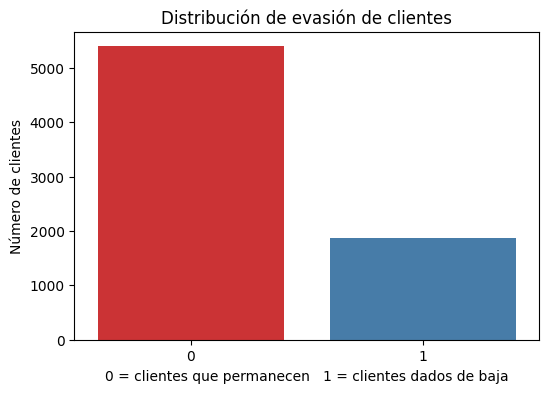

In [47]:
# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=datos_Telecom, x='churn', palette='Set1')
plt.title('Distribución de evasión de clientes')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Número de clientes')
plt.show()

In [68]:
# Conteo de la distribución de evasión de clientes
# Comprender como esta distribuida la variable "churn"(evasión) entre los clientes
#  Utilizar graficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja

churn_counts = datos_Telecom['churn'].value_counts()
churn_counts

,count
churn,
0,5398
1,1869


Al analizar la gráfica se aprecia que 5398 clientes siguen fieles a la empresa, por el contrario, 1869 ya han dejado la compañía.

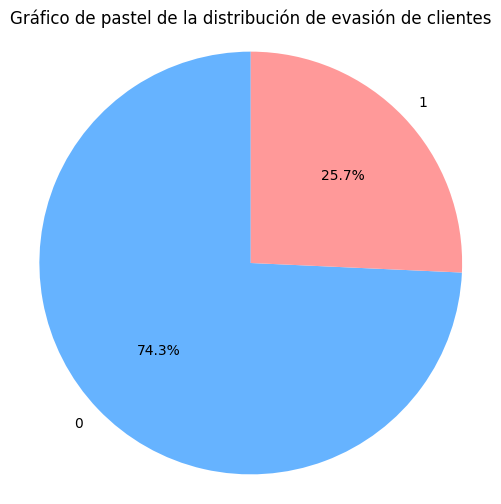

In [35]:
# Gráfico de pastel, colocar etiqueta a valores '1 = clientes dados de baja', '0 = clientes que permanecen'
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gráfico de pastel de la distribución de evasión de clientes')
plt.axis('equal')
plt.show()

En el gráfico anterior se observa el 25.7% de los clientes han abandonado la compañía por algún motivo y el 74.3% siguen con ella.

### **Recuento de evasión por variables categóricas**

Analizando la relación de distribución de la evasión de clientes con otras variables

####Relación de la evasión de clientes vs Género

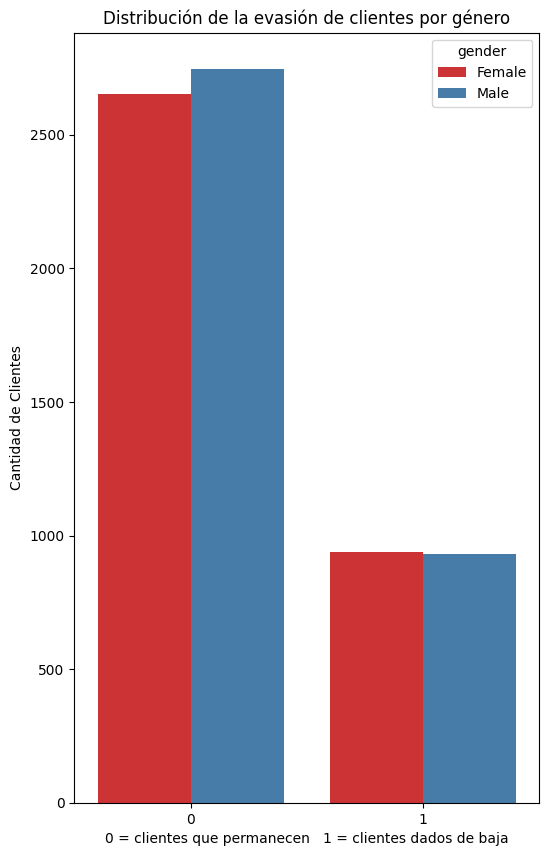

In [95]:
#### Relación Churn vs gender
plt.figure(figsize=(6, 10))
sns.countplot(x='churn', hue='gender', data=datos_Telecom, palette='Set1')
plt.title('Distribución de la evasión de clientes por género')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [97]:
#Obtener frecuencia de evasión de clientes por sexo
frecuencia_genero = pd.crosstab(datos_Telecom['churn'], datos_Telecom['gender'])
frecuencia_genero

gender,Female,Male
churn,,
0,2653,2745
1,939,930


In [98]:
#Obtener porcentaje de evasión de clientes por sexo
porcentaje_genero = pd.crosstab(datos_Telecom['churn'], datos_Telecom['gender'], normalize='index').round(4) * 100
porcentaje_genero

gender,Female,Male
churn,,
0,49.15,50.85
1,50.24,49.76


Como se aprecia, la relación que guarda la evasión de clientes con su tipo de sexo es practicamente nula y despreciable para un anaálisis futuro. No se encuentran evidencias de que el género de cada cliente influya en la decisión de abandonar la empresa o mantenerse en ella.

#### Relación Churn vs tipo de contrato

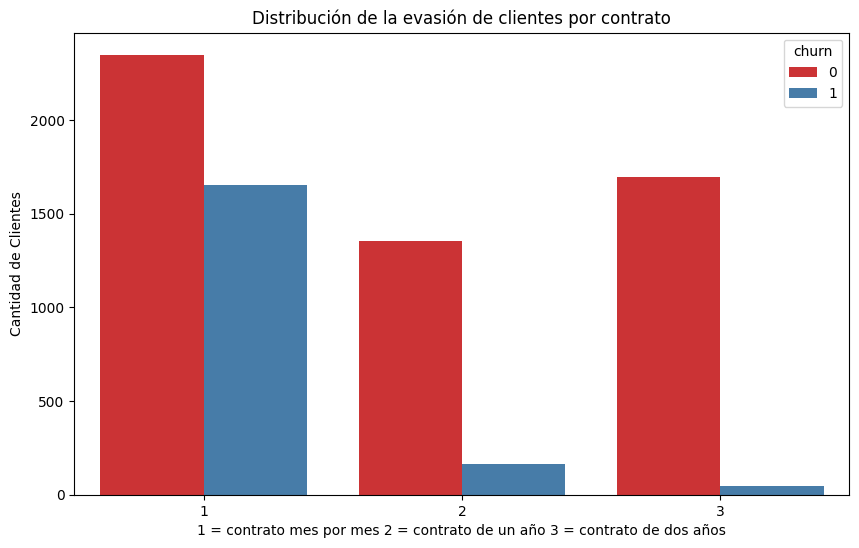

In [57]:
# Gráfico Tipo de contrato vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x = 'contract', hue = 'churn', data = datos_Telecom, palette = 'Set1')
plt.title('Distribución de la evasión de clientes por contrato')
plt.xlabel('1 = contrato mes por mes 2 = contrato de un año 3 = contrato de dos años')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [108]:
#Obtener frecuencia de los contratos
frecuencia_contrato = datos_Telecom.contract.value_counts()
#Estimar porcentajes
porcentaje_contrato = datos_Telecom.contract.value_counts(normalize=True).round(4) * 100
#distribución de frecuencias de los contratos
dist_frec_contrato = datos_Telecom.contract.value_counts()
dist_frec_contrato = pd.DataFrame({'Clientes': frecuencia_contrato, 'Porcentaje %': porcentaje_contrato})
dist_frec_contrato

,Clientes,Porcentaje %
contract,,
1,4005,55.11
3,1743,23.99
2,1519,20.90


In [109]:
#Calculando la distribucion de frecuencias Tipo de contrato vs Churn
frecuencia_contrato = pd.crosstab(datos_Telecom['contract'], datos_Telecom['churn'])
frecuencia_contrato

churn,0,1
contract,,
1,2350,1655
2,1353,166
3,1695,48


In [110]:
# Estimando los porcentajes Tipo de contrato vs Churn
frecuencia_contrato = pd.crosstab(datos_Telecom['contract'], datos_Telecom['churn'], normalize='index').round(4) * 100
frecuencia_contrato

churn,0,1
contract,,
1,58.68,41.32
2,89.07,10.93
3,97.25,2.75


In [106]:
dist_frec_contrato = datos_Telecom.contract.value_counts()
dist_frec_contrato

,count
contract,
1,4005
3,1743
2,1519


/tmp/ipython-input-1134270902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos_Telecom, x='contract', y='churn', palette='Set1')


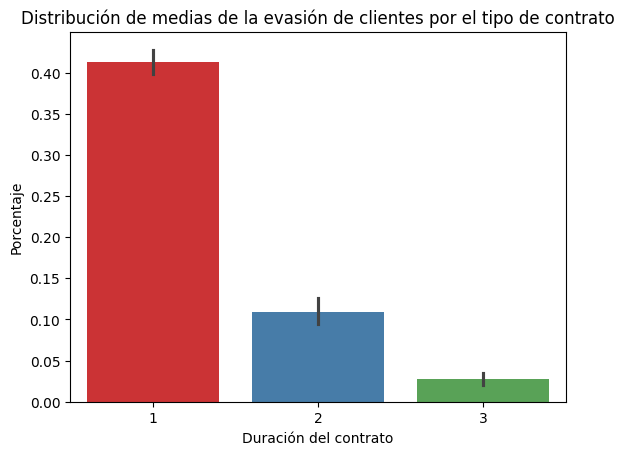

In [114]:
# Estimando la distribución de medias de la evasión de clientes por el tipo de contrato
sns.barplot(data=datos_Telecom, x='contract', y='churn', palette='Set1')
plt.title('Distribución de medias de la evasión de clientes por el tipo de contrato')
plt.xlabel('Duración del contrato')
plt.ylabel('Porcentaje')
plt.show()

De lo anterior podemos encontrar dos principales diferencias entre la distribución de la evasión de los clientes por contrato.

En los contratos mes por mes es donde se presenta la mayor cantidad de clientes que siguen con la empresa **(2350)** y la tasa de abandono también es muy alta, con **1655**.

Lo cual indica que el porcentaje de retención de clientes que pagan mes por mes **(58.68%)** es muy bajo en comparación a la tasa de abandono **(41.32%)**.

En los contratos de uno y dos años el índice de abandono de clientes es muy bajo, situandose entre el **(10.93 - 2.75%)**, respectivamente.

Lo cual nos muestra que probablemente el metodo de pago sería una variable de importancia para predecir la(s) principal(es) causa(s) de el abandono de los clientes de la empresa TelecomX.

El analisis de distribucion de medias nos indica que hay mayor probabilidad de que un cliente con la duración de contrato de mes por mes abandone la empresa al término del mismo, con una probabilidad mayor al **40%**

Además, como observamos anteriormente, el **55.11%** de los clientes tienen un contrato por mes, por lo que indagar más a fondo sobre las causas de evasión del usuario es primordial para que la empresa realice los cambios pertinentes y pueda revertir la situación negativa en la que se encuentra.

#### **Relación Churn vs tipo de pago**


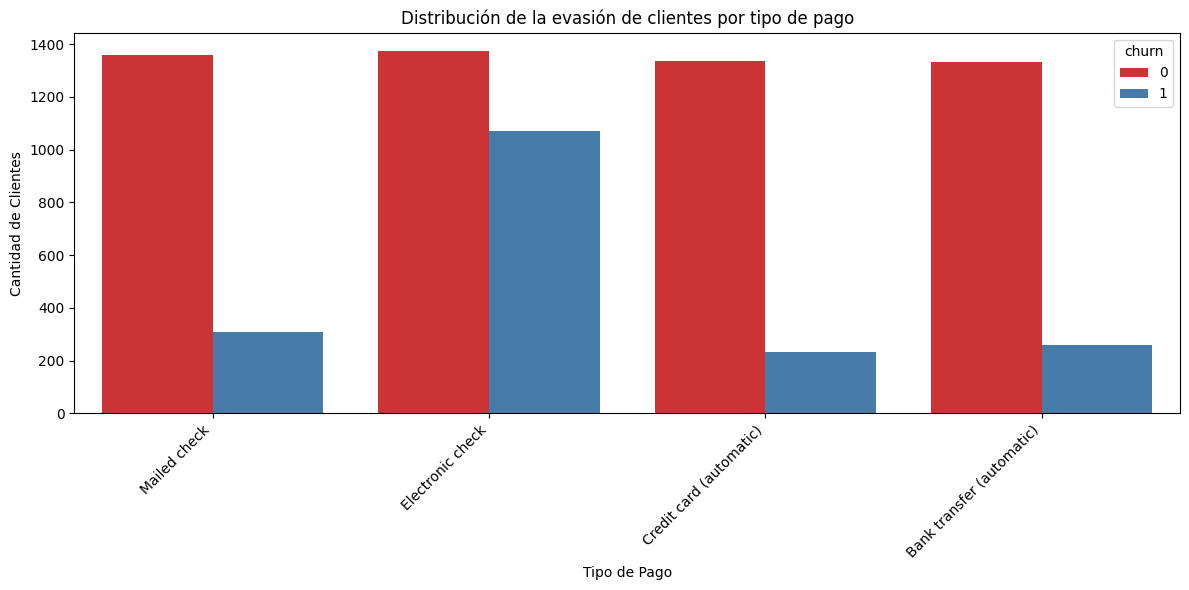

In [89]:
# Gráfico Tipo de pago vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x = 'payment_method', hue = 'churn', data = datos_Telecom, palette = 'Set1')
plt.title('Distribución de la evasión de clientes por tipo de pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right') # rotación de las etiquetas para una mejor distribución
plt.tight_layout() # Mejorar el ajuste para evitar que las etiquetas se superpongan.
plt.show()

In [92]:
#Calculando la distribucion de frecuencias Tipo de pago vs Churn
frecuencia_tipo_pago = pd.crosstab(datos_Telecom['payment_method'], datos_Telecom['churn'])
frecuencia_tipo_pago

churn,0,1
payment_method,,
Bank transfer (automatic),1331,258
Credit card (automatic),1336,232
Electronic check,1374,1071
Mailed check,1357,308


In [90]:
# Estimando los porcentajes Tipo de pago vs Churn
frecuencia_tipo_pago = pd.crosstab(datos_Telecom['payment_method'], datos_Telecom['churn'], normalize='index').round(4) * 100
frecuencia_tipo_pago

churn,0,1
payment_method,,
Bank transfer (automatic),83.76,16.24
Credit card (automatic),85.20,14.80
Electronic check,56.20,43.80
Mailed check,81.50,18.50


###Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

#### Relación de la evasión de clientes con el pago total (Total_charges vs churn)

/tmp/ipython-input-4246274483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=datos_Telecom, palette='Set1')


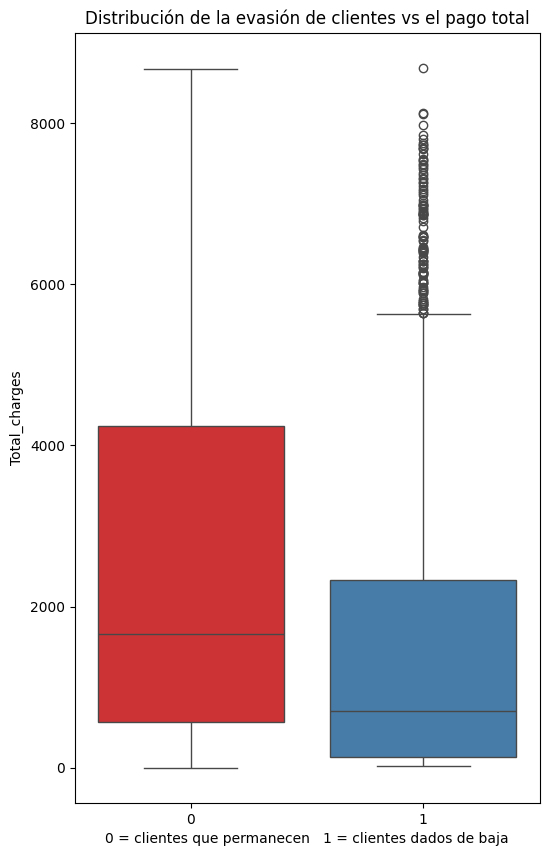

In [115]:
# Gráfico total_charges vs Churn

plt.figure(figsize=(6, 10))
sns.boxplot(x='churn', y='total_charges', data=datos_Telecom, palette='Set1')
plt.title('Distribución de la evasión de clientes vs el pago total')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Total_charges')
plt.show()

En el diagrama anterior se aprecia que los clientes que se dieron de baja presentaron los cargos totales más altos, teniendo una distribución asimétrica a la izquierda, lo que indica que **cargos elevados** generan una percepción negativa en cuanto al servicio y por ende abandonan la empresa.

/tmp/ipython-input-3033326281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y='total_charges', data=datos_Telecom, palette='Set1')


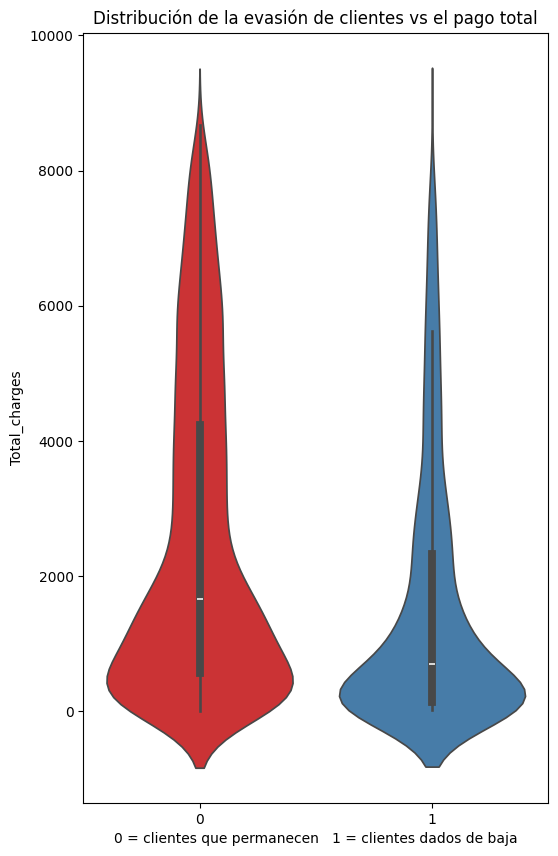

In [116]:
# Gráfico total_charges vs Churn
#violinplot
plt.figure(figsize=(6, 10))
sns.violinplot(x='churn', y='total_charges', data=datos_Telecom, palette='Set1')
plt.title('Distribución de la evasión de clientes vs el pago total')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Total_charges')
plt.show()

#### Relación de la evasión de clientes con el pago mensual (Monthly_charges vs churn)

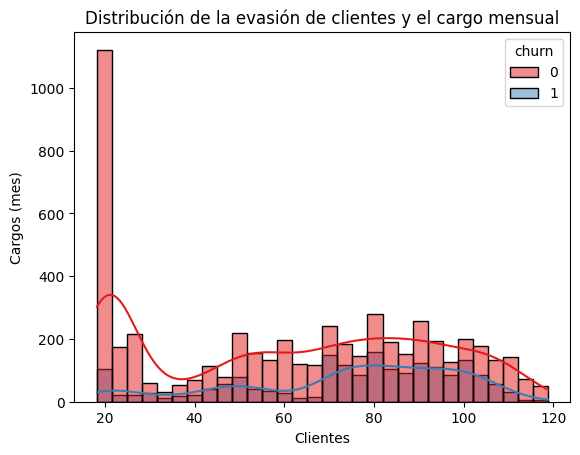

In [120]:
sns.histplot(data=datos_Telecom, x='monthly_charges', hue='churn', kde=True, bins=30, palette='Set1')
plt.title('Distribución de la evasión de clientes y el cargo mensual')
plt.xlabel('Clientes')
plt.ylabel('Cargos (mes)')
plt.show()

El histograma generado muestra que los clientes con cargos mensuales más elevados presentan una mayor tasa de evasión, mientras que aquellos con tarifas más bajas o moderadas tienden a permanecer en la compañía. Esta tendencia sugiere que el **precio del servicio** es un factor determinante en la decisión de cancelación.

La curva de densidad para clientes que se dieron de baja (churn = Yes or 1) se concentra en rangos altos de cargos mensuales, lo que indica una posible sensibilidad al precio. En contraste, los clientes que permanecen (churn = No or 0) se distribuyen más uniformemente en rangos bajos y medios.

#### Relación de la evasión de clientes con la duración del contrato (Tenure vs churn)

/tmp/ipython-input-3422437116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=datos_Telecom, palette='Set1')


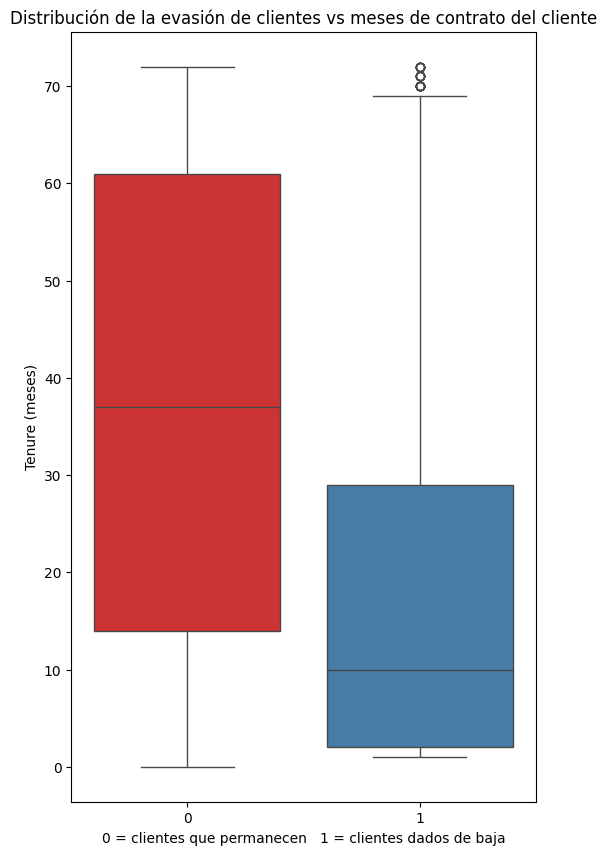

In [96]:
# Gráfico Tenure vs Churn
#distribución de la evasión de clientes vs meses de contrato del cliente
plt.figure(figsize=(6, 10))
sns.boxplot(x='churn', y='tenure', data=datos_Telecom, palette='Set1')
plt.title('Distribución de la evasión de clientes vs meses de contrato del cliente')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Tenure (meses)')
plt.show()


In [107]:
#Obtener frecuencia de meses por contrato del cliente
frecuencia_meses_contrato = pd.crosstab(datos_Telecom['churn'], datos_Telecom['tenure'])
frecuencia_meses_contrato

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
churn,,,,,,,,,,,,,,,,,,,,,
0,11,254,123,113,102,74,75,85,88,79,...,69,79,69,76,95,95,92,111,170,363
1,0,380,123,94,83,64,40,51,42,46,...,4,4,9,13,10,9,8,11,6,6


In [94]:
# Estimando los porcentajes de meses por contrato del cliente
frecuencia_tipo_pago = pd.crosstab(datos_Telecom['churn'], datos_Telecom['tenure'], normalize='index').round(4) * 100
frecuencia_tipo_pago

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
churn,,,,,,,,,,,,,,,,,,,,,
0,0.2,4.71,2.28,2.09,1.89,1.37,1.39,1.57,1.63,1.46,...,1.28,1.46,1.28,1.41,1.76,1.76,1.70,2.06,3.15,6.72
1,0.0,20.33,6.58,5.03,4.44,3.42,2.14,2.73,2.25,2.46,...,0.21,0.21,0.48,0.70,0.54,0.48,0.43,0.59,0.32,0.32


En el gráfico de caja anterior podemos observar dos marcadas diferencias entre las relaciones de los clientes que permanecen y los clientes dados de baja.

Al centranos en estos últimos, podemos decir que la relación es asimétrica a la izquierda, donde podemos decir que hay

##📄Informe final